In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your final preprocessed dataset
df = pd.read_csv("heart_selected_features_final.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target distribution:\n", df['target'].value_counts())

X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Dataset shape: (229, 6)
Columns: ['oldpeak', 'ca', 'cp_0', 'thal_2', 'thal_3', 'target']
Target distribution:
 target
1    133
0     96
Name: count, dtype: int64
Features shape: (229, 5)
Target shape: (229,)


Saving heart_selected_features_final.csv to heart_selected_features_final (1).csv
Dataset shape: (229, 5)
Class distribution:
 target
1    133
0     96
Name: count, dtype: int64
Training samples: 183
Testing samples: 46

=== Logistic Regression Hyperparameter Tuning ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score (F1): 0.8537889326564756

=== Logistic Regression Performance (Test Set) ===
Accuracy: 0.8695652173913043
Precision: 0.8620689655172413
Recall: 0.9259259259259259
F1 Score: 0.8928571428571429
ROC AUC: 0.861598440545809

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.79      0.83        19
     Disease       0.86      0.93      0.89        27

    accuracy                           0.87        46
   macro avg       0.87      0.86      0.86        46
weighted avg       0.87      0.87      0.87     

<Figure size 800x600 with 0 Axes>

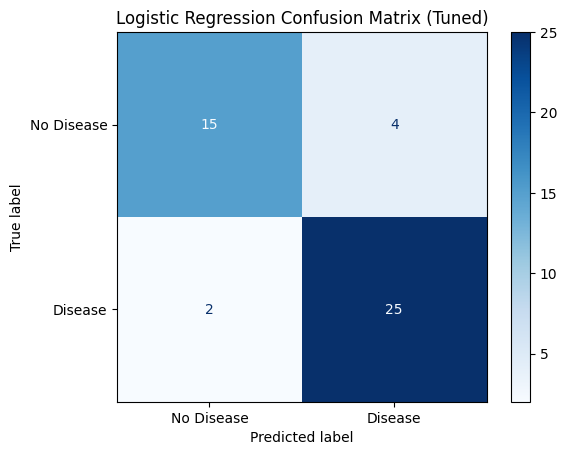

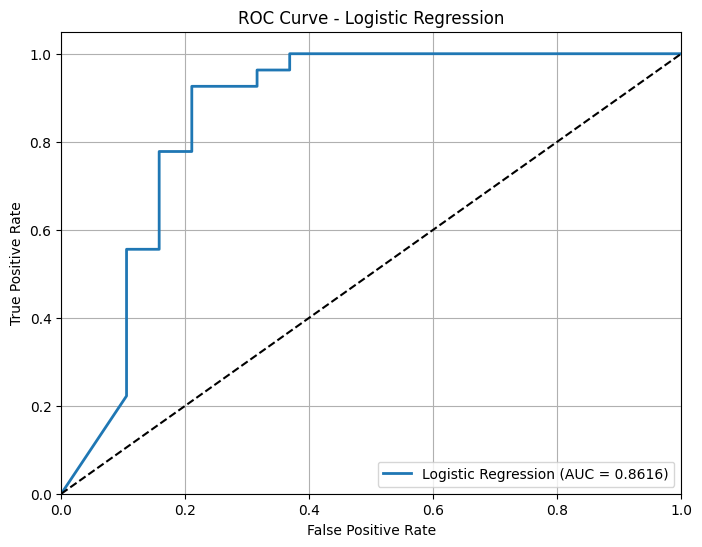


=== Proper Cross-Validation ===
Logistic Regression CV F1 Scores: [0.913  0.7556 0.9268 0.85   0.8372]
Logistic Regression Mean CV F1: 0.8565 +/- 0.1225

Overfitting Analysis:
Train Accuracy: 0.8251
Test Accuracy:  0.8696
Accuracy Gap:   0.0444
--- GOOD GENERALIZATION ---


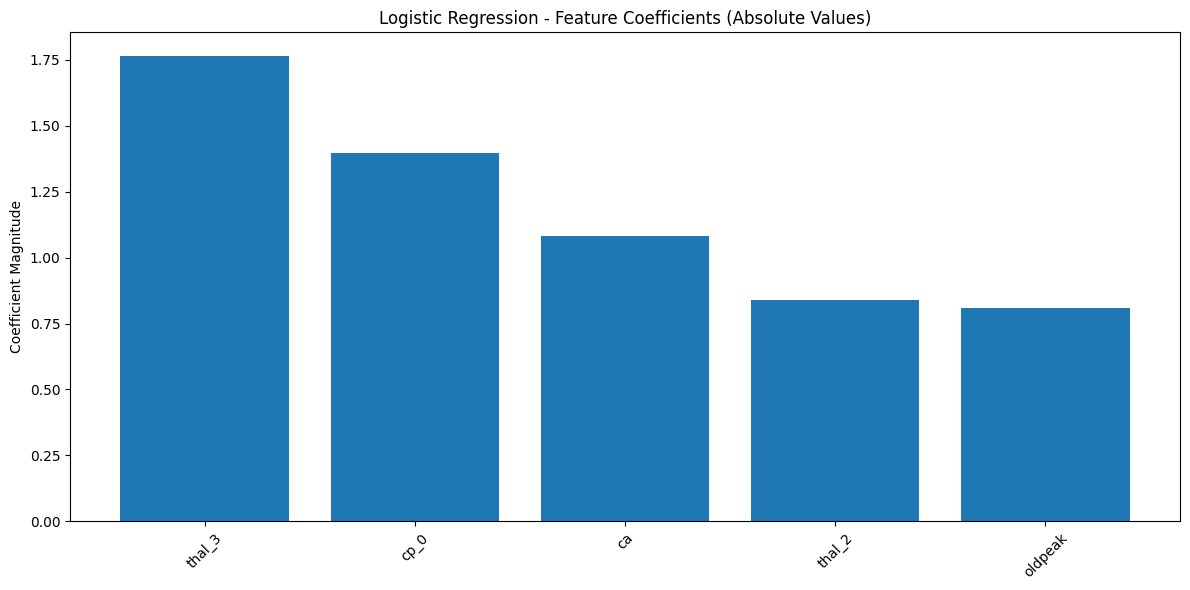


Top 5 Most Influential Features:
  thal_3: -1.7662
  cp_0: -1.3976
  ca: -1.0809
  thal_2: 0.8390
  oldpeak: -0.8107

✓ Logistic Regression model saved as 'logistic_regression_model.pkl'


In [ ]:
# IT24103286 - Logistic Regression Model
from google.colab import files
uploaded = files.upload()

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                           classification_report, roc_curve)
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Loading the preprocessed dataset
df = pd.read_csv("heart_selected_features_final.csv")

# Preparing features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", X.shape)
print("Class distribution:\n", y.value_counts())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Define consistent CV strategy
CV_STRATEGY = 5
cv = StratifiedKFold(n_splits=CV_STRATEGY, shuffle=True, random_state=42)

# Hyperparameter tuning for Logistic Regression
print("\n=== Logistic Regression Hyperparameter Tuning ===")
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2'],
    "solver": ['liblinear']
}

grid_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_lr,
    scoring="f1",
    cv=CV_STRATEGY,
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best CV Score (F1):", grid_lr.best_score_)

# Getting the tuned model
lr_model = grid_lr.best_estimator_

# Test set evaluation
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("\n=== Logistic Regression Performance (Test Set) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Disease', 'Disease']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr),
                       display_labels=['No Disease', 'Disease']).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix (Tuned)")
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr, linewidth=2, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Proper Cross-Validation
print("\n=== Proper Cross-Validation ===")
lr_fresh = LogisticRegression(**grid_lr.best_params_, random_state=42, max_iter=1000)
lr_cv_scores = cross_val_score(lr_fresh, X_train, y_train, cv=cv, scoring="f1")

print("Logistic Regression CV F1 Scores:", lr_cv_scores.round(4))
print("Logistic Regression Mean CV F1:", lr_cv_scores.mean().round(4), "+/-", (lr_cv_scores.std() * 2).round(4))

# Overfitting analysis
train_pred = lr_model.predict(X_train)
test_pred = y_pred_lr

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
accuracy_gap = abs(train_accuracy - test_accuracy)

print(f"\nOverfitting Analysis:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
print(f"Accuracy Gap:   {accuracy_gap:.4f}")

if accuracy_gap > 0.05:
    print("--- POTENTIAL OVERFITTING ---")
else:
    print("--- GOOD GENERALIZATION ---")

# Feature Coefficients
plt.figure(figsize=(12, 6))
coefficients = lr_model.coef_[0]
feature_names = X.columns
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_idx]))
plt.xticks(range(len(coefficients)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title("Logistic Regression - Feature Coefficients (Absolute Values)")
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

print("\nTop 5 Most Influential Features:")
for i in range(min(5, len(coefficients))):
    print(f"  {feature_names[sorted_idx[i]]}: {coefficients[sorted_idx[i]]:.4f}")

# Save the model
import joblib
joblib.dump(lr_model, 'logistic_regression_model.pkl')
print("\n✓ Logistic Regression model saved as 'logistic_regression_model.pkl'")